#### Installing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd

#### Loading and Understanding data

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("There are {} rows and {} columns in the given data".format(data.shape[0], data.shape[1]))
print("There are {} rows and {} columns in test".format(test.shape[0], test.shape[1]))

There are 19104 rows and 13 columns in the given data
There are 741 rows and 1 columns in test


In [4]:
data.iloc[:,0:10].head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2


In [5]:
data.iloc[:,10:].head()

,Designation,Total Business Value,Quarterly Rating
0,1,2381060,2
1,1,-665480,2
2,1,0,2
3,2,0,1
4,2,0,1


In [6]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [7]:
set(test.Emp_ID) - set(data.Emp_ID)

set()

In [8]:
print(data.shape[0])
print(data[data.Emp_ID.isin(test.Emp_ID)].shape[0])
print(data[data.Emp_ID.isin(test.Emp_ID)]['Emp_ID'].nunique())

19104
8588
741


In [9]:
test = pd.merge(test, data, how = 'left', on = 'Emp_ID')
test.shape

(8588, 13)

In [10]:
test.head(10)

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2
5,394,2016-06-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,427870,2
6,394,2016-07-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,1320640,3
7,394,2016-08-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,819300,3
8,394,2016-09-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,1816560,3
9,394,2016-10-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,4687690,3


In [11]:
data = data[~(data.Emp_ID.isin(test.Emp_ID))]
data.shape

(10516, 13)

In [12]:
data.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1
11,2016-02-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,120360,1


In [13]:
data.rename(columns = {'MMM-YY': 'RD', 'Dateofjoining': 'JD'}, inplace = True)
test.rename(columns = {'MMM-YY': 'RD', 'Dateofjoining': 'JD'}, inplace = True)

In [14]:
#### Analzing Reporting Date, Joining Date, Last Working Date, Quarterly Rating

In [15]:
data[['Emp_ID','RD','JD','LastWorkingDate','Total Business Value','Quarterly Rating']].head(20)

,Emp_ID,RD,JD,LastWorkingDate,Total Business Value,Quarterly Rating
0,1,2016-01-01,2015-12-24,NaN,2381060,2
1,1,2016-02-01,2015-12-24,NaN,-665480,2
2,1,2016-03-01,2015-12-24,2016-03-11,0,2
5,4,2016-12-01,2016-12-07,NaN,0,1
6,4,2017-01-01,2016-12-07,NaN,0,1
7,4,2017-02-01,2016-12-07,NaN,0,1
8,4,2017-03-01,2016-12-07,NaN,350000,1
9,4,2017-04-01,2016-12-07,2017-04-27,0,1
10,5,2016-01-01,2016-01-09,NaN,0,1
11,5,2016-02-01,2016-01-09,NaN,120360,1


In [16]:
test[['Emp_ID','RD','JD','LastWorkingDate','Total Business Value','Quarterly Rating']].head(20)

,Emp_ID,RD,JD,LastWorkingDate,Total Business Value,Quarterly Rating
0,394,2016-01-01,2011-06-06,NaN,189360,1
1,394,2016-02-01,2011-06-06,NaN,390810,1
2,394,2016-03-01,2011-06-06,NaN,1846360,1
3,394,2016-04-01,2011-06-06,NaN,194010,2
4,394,2016-05-01,2011-06-06,NaN,371160,2
5,394,2016-06-01,2011-06-06,NaN,427870,2
6,394,2016-07-01,2011-06-06,NaN,1320640,3
7,394,2016-08-01,2011-06-06,NaN,819300,3
8,394,2016-09-01,2011-06-06,NaN,1816560,3
9,394,2016-10-01,2011-06-06,NaN,4687690,3


In [17]:
data_TBV = data.groupby(['Emp_ID'])['Total Business Value'].sum().reset_index()
data_TBV.rename(columns = {'Total Business Value':'TBV'}, inplace = True)
data = pd.merge(data, data_TBV, how = 'inner', on = 'Emp_ID')
data_QR = data.groupby(['Emp_ID'])['Quarterly Rating'].mean().reset_index()
data_QR.rename(columns = {'Quarterly Rating':'QR'}, inplace = True)
data = pd.merge(data, data_QR, how = 'inner', on = 'Emp_ID')
data.fillna(value = '9999-99-99', inplace = True)
data_LWD = data.groupby(['Emp_ID'])['LastWorkingDate'].min().reset_index()
data_LWD.rename(columns = {'LastWorkingDate': 'LWD'}, inplace = True)
data = pd.merge(data, data_LWD, how = 'inner', on = 'Emp_ID')
data.drop(['Total Business Value', 'LastWorkingDate', 'Quarterly Rating'], axis = 1, inplace = True)
data.drop_duplicates(subset = ['Emp_ID'], keep = 'first', inplace = True)
data.shape

(1640, 13)

In [18]:
data.head()

,RD,Emp_ID,Age,Gender,City,Education_Level,Salary,JD,Joining Designation,Designation,TBV,QR,LWD
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,1715580,2.0,2016-03-11
3,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,350000,1.0,2017-04-27
8,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,1,1,120360,1.0,2016-03-07
11,2017-09-01,8,34,Male,C2,College,70656,2017-09-19,3,3,0,1.0,2017-11-15
14,2016-07-01,12,35,Male,C23,Master,28116,2016-06-29,1,1,2607180,2.5,2016-12-21


In [19]:
sorted(data['LWD'].unique(), reverse = True)[0:10]

['9999-99-99',
 '2017-12-28',
 '2017-12-27',
 '2017-12-26',
 '2017-12-25',
 '2017-12-23',
 '2017-12-21',
 '2017-12-20',
 '2017-12-19',
 '2017-12-18']

In [20]:
# As, we can see above RD is adjusted to nearby month and year. 

In [21]:
data['resigned'] = (data['LWD'] != '9999-99-99')
data['resigned'].value_counts()

True     1616
False      24
Name: resigned, dtype: int64

In [22]:
test_TBV = test.groupby(['Emp_ID'])['Total Business Value'].sum().reset_index()
test_TBV.rename(columns = {'Total Business Value':'TBV'}, inplace = True)
test = pd.merge(test, test_TBV, how = 'inner', on = 'Emp_ID')
test_QR = test.groupby(['Emp_ID'])['Quarterly Rating'].mean().reset_index()
test_QR.rename(columns = {'Quarterly Rating':'QR'}, inplace = True)
test = pd.merge(test, test_QR, how = 'inner', on = 'Emp_ID')
test.drop_duplicates(subset = ['Emp_ID'], keep = 'first', inplace = True)
test.rename(columns = {'LastWorkingDate': 'LWD'}, inplace = True)
test.drop(['Total Business Value', 'Quarterly Rating'], axis = 1, inplace = True)
test.shape

(741, 13)

In [23]:
test.head()

,Emp_ID,RD,Age,Gender,City,Education_Level,Salary,JD,LWD,Joining Designation,Designation,TBV,QR
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,27458220,2.125
24,173,2016-01-01,37,Male,C28,College,56174,2011-06-13,NaN,1,3,19866290,2.750
48,1090,2016-01-01,37,Male,C13,College,96750,2011-06-27,NaN,2,4,50382490,2.750
72,840,2016-01-01,39,Female,C8,College,88813,2011-07-11,NaN,1,4,17134040,1.500
96,308,2016-01-01,30,Male,C5,Master,188418,2011-08-15,NaN,2,5,58024490,2.625


In [24]:
print("There are {} rows and {} columns in the given data".format(data.shape[0], data.shape[1]))
print("There are {} rows and {} columns in test".format(test.shape[0], test.shape[1]))

There are 1640 rows and 14 columns in the given data
There are 741 rows and 13 columns in test


In [25]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,"No of NAs":data.isna().sum(),
                         "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [26]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
RD,object,0,24,['2016-01-01' '2016-12-01' '2017-09-01' '2016-...
Emp_ID,int64,0,1640,[ 1 4 5 ... 2785 2786 2787]
Age,int64,0,33,[28 43 29 34 35 30 42 27 26 33 40 31 32 22 44 ...
Gender,object,0,2,['Male' 'Female']
City,object,0,29,['C23' 'C13' 'C9' 'C2' 'C19' 'C20' 'C17' 'C29'...
Education_Level,object,0,3,['Master' 'College' 'Bachelor']
Salary,int64,0,1614,[57387 65603 46368 ... 12105 35370 69498]
JD,object,0,704,['2015-12-24' '2016-12-07' '2016-01-09' '2017-...
Joining Designation,int64,0,5,[1 2 3 4 5]
Designation,int64,0,5,[1 2 3 4 5]


In [27]:
understand_data(test)

,Datatype,No of NAs,No of Levels,Levels
Emp_ID,int64,0,741,[ 394 173 1090 840 308 1864 1606 954 2422 ...
RD,object,0,22,['2016-01-01' '2016-02-01' '2016-04-01' '2016-...
Age,int64,0,34,[32 37 39 30 42 29 46 31 44 43 33 41 38 35 45 ...
Gender,object,0,2,['Female' 'Male']
City,object,0,29,['C20' 'C28' 'C13' 'C8' 'C5' 'C29' 'C12' 'C4' ...
Education_Level,object,0,3,['Master' 'College' 'Bachelor']
Salary,int64,0,736,[ 97722 56174 96750 88813 188418 85688 99...
JD,object,0,401,['2011-06-06' '2011-06-13' '2011-06-27' '2011-...
LWD,object,741,0,[nan]
Joining Designation,int64,0,5,[2 1 5 3 4]


#### Data type conversion

In [28]:
data['LWD'].replace(to_replace = '9999-99-99', value = np.nan, inplace = True)
data['RD'] = pd.to_datetime(data['RD'])
data['JD'] = pd.to_datetime(data['JD'])
data['LWD'] = pd.to_datetime(data['LWD'])

test['LWD'].replace(to_replace = '9999-99-99', value = np.nan, inplace = True)
test['RD'] = pd.to_datetime(test['RD'])
test['JD'] = pd.to_datetime(test['JD'])
test['LWD'] = pd.to_datetime(test['LWD'])

In [29]:
data.dtypes

RD                     datetime64[ns]
Emp_ID                          int64
Age                             int64
Gender                         object
City                           object
Education_Level                object
Salary                          int64
JD                     datetime64[ns]
Joining Designation             int64
Designation                     int64
TBV                             int64
QR                            float64
LWD                    datetime64[ns]
resigned                         bool
dtype: object

In [30]:
data.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [31]:
# Function to calculate no of days between reporting date and date of joining
import datetime
def daysbn_RD_JD(RD, JD):
    return ((RD - JD).days)

In [32]:
#data['daysbnRDJD'] = data[['RD', 'JD']].apply(lambda x: daysbn_RD_JD(x[0],x[1]), axis = 1)
#data['daysbnRDJD'].head()

In [33]:
#print(min(data.daysbnRDJD.unique()))
#print(max(data.daysbnRDJD.unique()))

In [34]:
#test['daysbnRDJD'] = test[['RD', 'JD']].apply(lambda x: daysbn_RD_JD(x[0],x[1]), axis = 1)
#test['daysbnRDJD'].head()

In [35]:
#print(min(test.daysbnRDJD.unique()))
#print(max(test.daysbnRDJD.unique()))

In [36]:
# Function to calculate tenure i.e., no of days between Last Working Day and date of joining.
# For employees who have resigned LWD is given, for those who haven't yet resigned LWD is blank. 
# As the task is to predict whether an employee will leave in the next 2 quarters i.e., from 01 Jan 2018 - 01 July 2018,
# let us impute the LWD as 02 July 2018 for those employees who haven't yet resigned - inorder to calculate the tenure.
def calc_tenure(JD, LWD):
    if LWD == pd.NaT:
        tenure = (LWD - JD).days
    else:
        today = datetime.datetime(2018, 7, 2)
        tenure = (today - JD).days
    return (tenure)

In [37]:
#data['tenure'] = data[['JD', 'LWD']].apply(lambda x: calc_tenure(x[0],x[1]), axis = 1)
#data['tenure'].head()

In [38]:
#test['tenure'] = test[['JD', 'LWD']].apply(lambda x: calc_tenure(x[0],x[1]), axis = 1)
#test['tenure'].head()

In [39]:
#test['LWD'].apply(lambda x : None if x=="NaT" else x)
#test['LWD'].replace({None: np.nan}, inplace = True)

In [40]:
# Function to calculate tenure i.e., no of days between Reporting Day month end and date of joining.
def calc_tenure(JD, RD):
    if RD.month == 2:
        date = datetime.datetime(RD.year, RD.month, 28)
    else:
        date = datetime.datetime(RD.year, RD.month, 30)
    tenure = (date - JD).days
    return (tenure)

In [41]:
data['tenure'] = data[['JD', 'RD']].apply(lambda x: calc_tenure(x[0],x[1]), axis = 1)
data['tenure'].head()

0    37
1    23
2    21
3    11
4    31
Name: tenure, dtype: int64

In [42]:
test['tenure'] = test[['JD', 'RD']].apply(lambda x: calc_tenure(x[0],x[1]), axis = 1)
test['tenure'].head()

0    1699
1    1692
2    1678
3    1664
4    1629
Name: tenure, dtype: int64

In [43]:
print(min(data.tenure.unique()))
print(max(data.tenure.unique()))

2
2129


In [44]:
print(min(test.tenure.unique()))
print(max(test.tenure.unique()))

2
2130


In [45]:
data.head()

,RD,Emp_ID,Age,Gender,City,Education_Level,Salary,JD,Joining Designation,Designation,TBV,QR,LWD,resigned,tenure
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,1715580,2.0,2016-03-11,True,37
1,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,350000,1.0,2017-04-27,True,23
2,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,1,1,120360,1.0,2016-03-07,True,21
3,2017-09-01,8,34,Male,C2,College,70656,2017-09-19,3,3,0,1.0,2017-11-15,True,11
4,2016-07-01,12,35,Male,C23,Master,28116,2016-06-29,1,1,2607180,2.5,2016-12-21,True,31


In [46]:
# Dropping unwanted columns
def drop_unwanted_cols(data, cols_list):
    data.drop(cols_list, axis = 1, inplace = True)
    return data

In [47]:
data = drop_unwanted_cols(data, ['Emp_ID', 'RD', 'JD', 'LWD'])

In [48]:
test = drop_unwanted_cols(test, ['Emp_ID', 'RD', 'JD', 'LWD'])

In [49]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
Age,int64,0,33,[28 43 29 34 35 30 42 27 26 33 40 31 32 22 44 ...
Gender,object,0,2,['Male' 'Female']
City,object,0,29,['C23' 'C13' 'C9' 'C2' 'C19' 'C20' 'C17' 'C29'...
Education_Level,object,0,3,['Master' 'College' 'Bachelor']
Salary,int64,0,1614,[57387 65603 46368 ... 12105 35370 69498]
Joining Designation,int64,0,5,[1 2 3 4 5]
Designation,int64,0,5,[1 2 3 4 5]
TBV,int64,0,1047,[1715580 350000 120360 ... 4284010 2815090 ...
QR,float64,0,137,[2. 1. 2.5 1.26086957 1...
resigned,bool,0,2,[ True False]


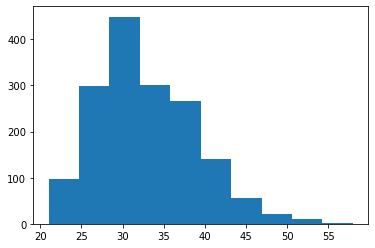

In [50]:
import matplotlib.pyplot as plt
plt.hist(data.Age)
plt.show()

In [51]:
test.Age.max()

54

In [52]:
data['Age_binned'] = pd.cut(data['Age'], 
                            bins = [21,25,29,33,35,38,43,60], 
                            labels = ['AG1','AG2','AG3','AG4','AG5','AG6','AG7'])

In [53]:
test['Age_binned'] = pd.cut(test['Age'], 
                            bins = [21,25,29,33,35,38,43,60], 
                            labels = ['AG1','AG2','AG3','AG4','AG5','AG6','AG7'])

In [54]:
data = drop_unwanted_cols(data, ['Age'])
test = drop_unwanted_cols(test, ['Age'])

In [55]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
Gender,object,0,2,['Male' 'Female']
City,object,0,29,['C23' 'C13' 'C9' 'C2' 'C19' 'C20' 'C17' 'C29'...
Education_Level,object,0,3,['Master' 'College' 'Bachelor']
Salary,int64,0,1614,[57387 65603 46368 ... 12105 35370 69498]
Joining Designation,int64,0,5,[1 2 3 4 5]
Designation,int64,0,5,[1 2 3 4 5]
TBV,int64,0,1047,[1715580 350000 120360 ... 4284010 2815090 ...
QR,float64,0,137,[2. 1. 2.5 1.26086957 1...
resigned,bool,0,2,[ True False]
tenure,int64,0,398,[ 37 23 21 11 31 1342 61 330 5 ...


In [56]:
cat_cols = data.select_dtypes(include = ['object','bool']).columns.values
cat_cols

array(['Gender', 'City', 'Education_Level', 'resigned'], dtype=object)

In [57]:
# Convert object and bool columns to categorical
def convert_to_categ(data, cat_cols):
    data[cat_cols] = data[cat_cols].astype('category')
    return data[cat_cols]

In [58]:
data[cat_cols] = convert_to_categ(data, cat_cols)

In [59]:
cat_cols = test.select_dtypes(include = ['object','bool']).columns.values
cat_cols

array(['Gender', 'City', 'Education_Level'], dtype=object)

In [60]:
test[cat_cols] = convert_to_categ(test, cat_cols)

In [61]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
Gender,category,0,2,"['Male', 'Female']\nCategories (2, object): ['..."
City,category,0,29,"['C23', 'C13', 'C9', 'C2', 'C19', ..., 'C3', '..."
Education_Level,category,0,3,"['Master', 'College', 'Bachelor']\nCategories ..."
Salary,int64,0,1614,[57387 65603 46368 ... 12105 35370 69498]
Joining Designation,int64,0,5,[1 2 3 4 5]
Designation,int64,0,5,[1 2 3 4 5]
TBV,int64,0,1047,[1715580 350000 120360 ... 4284010 2815090 ...
QR,float64,0,137,[2. 1. 2.5 1.26086957 1...
resigned,category,0,2,"[True, False]\nCategories (2, object): [True, ..."
tenure,int64,0,398,[ 37 23 21 11 31 1342 61 330 5 ...


In [62]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
Gender,category,0,2,"['Male', 'Female']\nCategories (2, object): ['..."
City,category,0,29,"['C23', 'C13', 'C9', 'C2', 'C19', ..., 'C3', '..."
Education_Level,category,0,3,"['Master', 'College', 'Bachelor']\nCategories ..."
Salary,int64,0,1614,[57387 65603 46368 ... 12105 35370 69498]
Joining Designation,int64,0,5,[1 2 3 4 5]
Designation,int64,0,5,[1 2 3 4 5]
TBV,int64,0,1047,[1715580 350000 120360 ... 4284010 2815090 ...
QR,float64,0,137,[2. 1. 2.5 1.26086957 1...
resigned,category,0,2,"[True, False]\nCategories (2, object): [True, ..."
tenure,int64,0,398,[ 37 23 21 11 31 1342 61 330 5 ...


In [63]:
cat_cols = test.select_dtypes(include = ['category']).columns
num_cols = data.select_dtypes(include = ['int','float']).columns

In [64]:
print(num_cols)
print("\n")
print(cat_cols)

Index(['Salary', 'Joining Designation', 'Designation', 'TBV', 'QR', 'tenure'], dtype='object')


Index(['Gender', 'City', 'Education_Level', 'Age_binned'], dtype='object')


In [65]:
# split predictors and target
traindata_x = data.drop(['resigned'],axis=1)
traindata_y = pd.DataFrame(data['resigned'])
print(traindata_x.columns);print(traindata_y.columns)

Index(['Gender', 'City', 'Education_Level', 'Salary', 'Joining Designation',
       'Designation', 'TBV', 'QR', 'tenure', 'Age_binned'],
      dtype='object')
Index(['resigned'], dtype='object')


In [66]:
# Split train and validation data
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y=train_test_split(traindata_x, traindata_y, test_size = 0.2, random_state = 42)
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)

(1312, 10)
(328, 10)
(1312, 1)
(328, 1)


In [67]:
# Imputation
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer()
cat_imputer = SimpleImputer(strategy = 'most_frequent')
num_imputer.fit(train_x[num_cols])
cat_imputer.fit(train_x[cat_cols])

# Impute values for NAs in numerical columns
train_x[num_cols]=num_imputer.transform(train_x[num_cols])
val_x[num_cols]=num_imputer.transform(val_x[num_cols])
test[num_cols]=num_imputer.transform(test[num_cols])

# Impute values for NAs in categorical columns
train_x[cat_cols] = cat_imputer.transform(train_x[cat_cols])
val_x[cat_cols] = cat_imputer.transform(val_x[cat_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

In [68]:
# Dummify the categorical columns
train_x = pd.get_dummies(train_x, columns = cat_cols, drop_first = True)
val_x = pd.get_dummies(val_x, columns = cat_cols, drop_first = True)
test = pd.get_dummies(test, columns = cat_cols, drop_first = True)

In [69]:
print(train_x.shape[1])
print(val_x.shape[1])
print(test.shape[1])

43
43
43


In [70]:
set(train_x.columns) - set(val_x.columns)

set()

In [71]:
set(val_x.columns) - set(train_x.columns)

set()

In [72]:
set(train_x.columns) - set(test.columns)

set()

In [73]:
set(test.columns) - set(train_x.columns)

set()

In [74]:
# Standardizing numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x[num_cols])
train_x[num_cols] = scaler.transform(train_x[num_cols])
val_x[num_cols] = scaler.transform(val_x[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

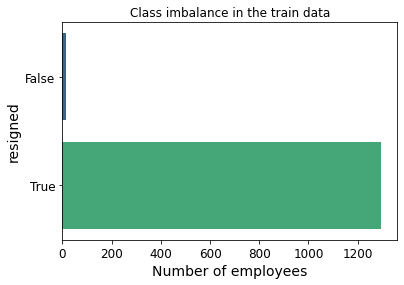

In [75]:
# plot to Showcase the Class imbalance for resigned (Yes/No)
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

sns.countplot(y = train_y['resigned'], palette='viridis')
plt.xlabel('Number of employees')
plt.title('Class imbalance in the train data')
plt.show()

In [76]:
train_y.resigned.value_counts()

True     1296
False      16
Name: resigned, dtype: int64

In [77]:
# Let us create a new level. Ordinal Encoding is done for encoding ordinal variables
mapper = {True:1,
          False:0
}

train_y['resigned'] = train_y.resigned.map(mapper)
val_y['resigned'] = val_y.resigned.map(mapper)

In [78]:
train_y.resigned.value_counts()

1    1296
0      16
Name: resigned, dtype: int64

In [79]:
val_y.resigned.value_counts()

1    320
0      8
Name: resigned, dtype: int64

**Model Building**

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# Build the model
lreg1 = LogisticRegression()

# Fit the model on train
lreg1.fit(train_x, train_y)

LogisticRegression()

In [81]:
# Predict on train and val
train_pred = lreg1.predict(train_x)
val_pred = lreg1.predict(val_x)

In [82]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [83]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[   0   16]
 [   0 1296]]


[[  0   8]
 [  0 320]]


In [84]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.99      1.00      0.99      1296

    accuracy                           0.99      1312
   macro avg       0.49      0.50      0.50      1312
weighted avg       0.98      0.99      0.98      1312



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.98      1.00      0.99       320

    accuracy                           0.98       328
   macro avg       0.49      0.50      0.49       328
weighted avg       0.95      0.98      0.96       328



In [85]:
# Logistic Regression with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
train_x_smote, train_y_smote = oversample.fit_resample(train_x, train_y)
print(train_y_smote.value_counts())


# Build the model
lreg2 = LogisticRegression()

# Fit the model on train
lreg2.fit(train_x_smote, train_y_smote)

resigned
0           1296
1           1296
dtype: int64


LogisticRegression()

In [86]:
# Predict on train and val
train_pred = lreg2.predict(train_x)
val_pred = lreg2.predict(val_x)

In [87]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [88]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[   2   14]
 [  38 1258]]


[[  1   7]
 [ 10 310]]


In [89]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.05      0.12      0.07        16
           1       0.99      0.97      0.98      1296

    accuracy                           0.96      1312
   macro avg       0.52      0.55      0.53      1312
weighted avg       0.98      0.96      0.97      1312



              precision    recall  f1-score   support

           0       0.09      0.12      0.11         8
           1       0.98      0.97      0.97       320

    accuracy                           0.95       328
   macro avg       0.53      0.55      0.54       328
weighted avg       0.96      0.95      0.95       328



In [90]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced', max_depth = 4)
#Fit the model on train
%time dt1.fit(train_x, train_y)

CPU times: user 9.96 ms, sys: 1.7 ms, total: 11.7 ms
Wall time: 11.1 ms


DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

In [91]:
# Predict on train and val
train_pred = dt1.predict(train_x)
val_pred = dt1.predict(val_x)

In [92]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [93]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[ 16   0]
 [516 780]]


[[  4   4]
 [120 200]]


In [94]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.03      1.00      0.06        16
           1       1.00      0.60      0.75      1296

    accuracy                           0.61      1312
   macro avg       0.52      0.80      0.40      1312
weighted avg       0.99      0.61      0.74      1312



              precision    recall  f1-score   support

           0       0.03      0.50      0.06         8
           1       0.98      0.62      0.76       320

    accuracy                           0.62       328
   macro avg       0.51      0.56      0.41       328
weighted avg       0.96      0.62      0.75       328



In [95]:
# Decision Tree with param grid
from sklearn.model_selection import GridSearchCV
dt_grid = DecisionTreeClassifier(random_state = 2, class_weight = 'balanced')

param_grid = {"min_samples_leaf": [2,3,4,5,6,7,8,9,10],
              "max_depth": [2,3,4,5,6,7,8,9],
              "criterion": ['entropy', 'gini']}

dt2 = GridSearchCV(dt_grid, param_grid, cv = 10, n_jobs = -1)
# Fit the model on train
%time dt2.fit(train_x,train_y)
print(dt2.best_score_,dt2.best_params_)

CPU times: user 1.34 s, sys: 142 ms, total: 1.48 s
Wall time: 14.4 s
0.898617857969003 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3}


In [96]:
# Predict on train and val
train_pred = dt2.predict(train_x)
val_pred = dt2.predict(val_x)

In [97]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [98]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[  16    0]
 [ 155 1141]]


[[  1   7]
 [ 36 284]]


In [99]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17        16
           1       1.00      0.88      0.94      1296

    accuracy                           0.88      1312
   macro avg       0.55      0.94      0.55      1312
weighted avg       0.99      0.88      0.93      1312



              precision    recall  f1-score   support

           0       0.03      0.12      0.04         8
           1       0.98      0.89      0.93       320

    accuracy                           0.87       328
   macro avg       0.50      0.51      0.49       328
weighted avg       0.95      0.87      0.91       328



In [100]:
# Decision Tree with param grid and SMOTE
from sklearn.model_selection import GridSearchCV
dt_grid = DecisionTreeClassifier(random_state = 2, class_weight = 'balanced')

param_grid = {"min_samples_leaf": [2,3,4,5,6,7,8,9,10],
              "max_depth": [2,3,4,5,6,7,8,9],
              "criterion": ['entropy', 'gini']}

dt3 = GridSearchCV(dt_grid, param_grid, cv = 10, n_jobs = -1)
# Fit the model on train
%time dt3.fit(train_x_smote, train_y_smote)
print(dt3.best_score_, dt3.best_params_)

CPU times: user 1.76 s, sys: 133 ms, total: 1.89 s
Wall time: 14.5 s
0.9436842886842886 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 9}


In [101]:
# Predict on train and val
train_pred = dt3.predict(train_x)
val_pred = dt3.predict(val_x)

In [102]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [103]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[   6   10]
 [  82 1214]]


[[  0   8]
 [ 24 296]]


In [104]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.07      0.38      0.12        16
           1       0.99      0.94      0.96      1296

    accuracy                           0.93      1312
   macro avg       0.53      0.66      0.54      1312
weighted avg       0.98      0.93      0.95      1312



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.97      0.93      0.95       320

    accuracy                           0.90       328
   macro avg       0.49      0.46      0.47       328
weighted avg       0.95      0.90      0.93       328



In [105]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state = 2, class_weight = 'balanced')
# Fit the model on train
rf1.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [106]:
# Predict on train and val
train_pred = rf1.predict(train_x)
val_pred = rf1.predict(val_x)

In [107]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [108]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[  16    0]
 [   0 1296]]


[[  0   8]
 [  0 320]]


In [109]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.98      1.00      0.99       320

    accuracy                           0.98       328
   macro avg       0.49      0.50      0.49       328
weighted avg       0.95      0.98      0.96       328



In [110]:
# Random Forest with Grid
from sklearn.ensemble import RandomForestClassifier
rf_grid = RandomForestClassifier(random_state = 2, class_weight = 'balanced')
param_grid = {"min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4],
              "max_depth": [2,4,6,8,10,None],
              "criterion": ['entropy', 'gini'],
              "n_estimators" : [40,80,120,160,200],
              "max_features": ['auto','sqrt']}
rf2 = GridSearchCV(rf_grid, param_grid, cv = 5, n_jobs = -1)
# Fit the model on train
%time rf2.fit(train_x, train_y)
print(rf2.best_score_, rf2.best_params_)

CPU times: user 15.8 s, sys: 1.33 s, total: 17.1 s
Wall time: 10min 50s
0.9878065770760166 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


In [111]:
# Predict on train and val
train_pred = rf2.predict(train_x)
val_pred = rf2.predict(val_x)

In [112]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [113]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[  13    3]
 [   3 1293]]


[[  0   8]
 [  2 318]]


In [114]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      1312
   macro avg       0.91      0.91      0.91      1312
weighted avg       1.00      1.00      1.00      1312



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.98      0.99      0.98       320

    accuracy                           0.97       328
   macro avg       0.49      0.50      0.49       328
weighted avg       0.95      0.97      0.96       328



In [115]:
# Random Forest with Grid and SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_grid = RandomForestClassifier(random_state = 2, class_weight = 'balanced')
param_grid = {"min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4],
              "max_depth": [2,4,6,8,10,None],
              "criterion": ['entropy', 'gini'],
              "n_estimators" : [40,80,120,160,200],
              "max_features": ['auto','sqrt']}
rf3 = GridSearchCV(rf_grid, param_grid, cv = 5, n_jobs = -1)
# Fit the model on train
%time rf3.fit(train_x_smote, train_y_smote)
print(rf3.best_score_, rf3.best_params_)

CPU times: user 15.9 s, sys: 1.36 s, total: 17.3 s
Wall time: 13min 58s
0.9926745077034095 {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 120}


In [116]:
# Predict on train and val
train_pred = rf3.predict(train_x)
val_pred = rf3.predict(val_x)

In [117]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_val = confusion_matrix(val_y, val_pred)

In [118]:
print(confusion_matrix_train)
print("\n")
print(confusion_matrix_val)

[[  11    5]
 [   0 1296]]


[[  0   8]
 [  2 318]]


In [119]:
print(classification_report(train_y, train_pred))
print("\n")
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      1312
   macro avg       1.00      0.84      0.91      1312
weighted avg       1.00      1.00      1.00      1312



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.98      0.99      0.98       320

    accuracy                           0.97       328
   macro avg       0.49      0.50      0.49       328
weighted avg       0.95      0.97      0.96       328



#### AutoEncoders (as dataset is hugely imbalanced)

In [120]:
train = pd.concat([train_x, train_y], axis = 1)
val = pd.concat([val_x, val_y], axis = 1)
print(train.shape, val.shape)

(1312, 44) (328, 44)


In [121]:
data = pd.concat([train, val], axis = 0)
data.shape

(1640, 44)

In [122]:
data.head()

,Salary,Joining Designation,Designation,TBV,QR,tenure,Gender_Male,City_C10,City_C11,City_C12,...,City_C9,Education_Level_College,Education_Level_Master,Age_binned_AG2,Age_binned_AG3,Age_binned_AG4,Age_binned_AG5,Age_binned_AG6,Age_binned_AG7,resigned
63,-0.826363,-0.906383,-1.044117,-0.407506,-0.668109,-0.524900,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1308,-1.225248,-0.906383,-1.044117,-0.331915,-0.668109,0.068153,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1018,-0.628110,0.303357,0.050912,-0.458849,-0.668109,-0.506450,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1046,1.333150,-0.906383,1.145941,1.730095,1.290830,-0.245506,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1202,0.021752,0.303357,0.050912,-0.458849,-0.668109,-0.545986,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [123]:
data.columns

Index(['Salary', 'Joining Designation', 'Designation', 'TBV', 'QR', 'tenure',
       'Gender_Male', 'City_C10', 'City_C11', 'City_C12', 'City_C13',
       'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19',
       'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24',
       'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3',
       'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9',
       'Education_Level_College', 'Education_Level_Master', 'Age_binned_AG2',
       'Age_binned_AG3', 'Age_binned_AG4', 'Age_binned_AG5', 'Age_binned_AG6',
       'Age_binned_AG7', 'resigned'],
      dtype='object')

In [124]:
data = data.values

In [125]:
data_r = data[data[:,-1] == 1]
val_nr  = data[data[:,-1] == 0]

train_r, val_r = train_test_split(data_r, test_size = 0.2, random_state = 123)

In [126]:
print(data.shape)
print(train_r.shape)
print(val_r.shape)
print(val_nr.shape)

(1640, 44)
(1292, 44)
(324, 44)
(24, 44)


In [127]:
# Checking the target distribution
print(np.unique(data[:,-1], return_counts = True))
print(np.unique(train_r[:,-1], return_counts = True))
print(np.unique(val_r[:,-1], return_counts = True))
print(np.unique(val_nr[:,-1], return_counts = True))

(array([0., 1.]), array([  24, 1616]))
(array([1.]), array([1292]))
(array([1.]), array([324]))
(array([0.]), array([24]))


In [128]:
# Extracting only independent features
X_train_r = train_r[:,:-1]
X_val_r = val_r[:,:-1]
X_val_nr = val_nr[:,:-1]

In [129]:
input_dim = X_train_r.shape[1]
print("Input Dim:", input_dim)
encoding_dim = 150
print("Encoding Dim:", encoding_dim)

Input Dim: 43
Encoding Dim: 150


In [130]:
# AutoEncoders Model Building
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Input placeholder
input_att = Input(shape = (input_dim,))

input_dropout = Dropout(0.2)(input_att)
 
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation = 'relu')(input_dropout)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation = 'tanh')(encoded)

autoencoder = Model(input_att, decoded)

In [131]:
# Compile the model
autoencoder.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [132]:
# Fit the model
autoencoder.fit(X_train_r, X_train_r, epochs = 100, shuffle = True, validation_split = 0.2, verbose = 1)

Epoch 1/100
33/33 [==============================] - 1s 6ms/step - loss: 0.1935 - val_loss: 0.1177
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1219 - val_loss: 0.0877
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.0735
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0899 - val_loss: 0.0646
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0841 - val_loss: 0.0586
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0788 - val_loss: 0.0542
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0751 - val_loss: 0.0508
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0483
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0711 - val_loss: 0.0468
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0693 - val_loss: 0.0453
Epoch 11/

33/33 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.0356
Epoch 84/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0616 - val_loss: 0.0366
Epoch 85/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0357
Epoch 86/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0358
Epoch 87/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.0355
Epoch 88/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0624 - val_loss: 0.0352
Epoch 89/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0359
Epoch 90/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0355
Epoch 91/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0355
Epoch 92/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0603 - val_loss: 0.0356
Epoch 93/100


In [133]:
# Evaluate the loss on resigned train records
autoencoder.evaluate(X_train_r, X_train_r)

41/41 [==============================] - 0s 998us/step - loss: 0.0403


0.0403100848197937

In [134]:
# Evaluate the loss on resigned validation records
autoencoder.evaluate(X_val_r, X_val_r)

11/11 [==============================] - 0s 986us/step - loss: 0.0388


0.0387859046459198

In [135]:
# Evaluate the loss on not-resigned validation records
autoencoder.evaluate(X_val_nr, X_val_nr)

1/1 [==============================] - 0s 18ms/step - loss: 0.0562


0.056201592087745667

In [136]:
# Function to calculate mse for each record
def mse_for_each_record(act, pred):
    error = act - pred
    squared_error = np.square(error)
    mean_squared_error = np.mean(squared_error, axis=1)
    return mean_squared_error

In [137]:
# Making predictions on resigned train records and calculating their mse
pred_train_r = autoencoder.predict(X_train_r)
mse_train_r = mse_for_each_record(X_train_r, pred_train_r)

# Making predictions on resigned val records and calculating their mse
pred_val_r = autoencoder.predict(X_val_r)
mse_val_r = mse_for_each_record(X_val_r, pred_val_r)

# Making predictions on not-resigned val records and calculating their mse
pred_val_nr = autoencoder.predict(X_val_nr)
mse_val_nr = mse_for_each_record(X_val_nr, pred_val_nr)

In [138]:
# Decide cut off mse (which is used to categorize a record as either resigned/not-resigned based on its MSE value)
#cut_off = np.round(np.percentile(mse_train_r,99),2)
cut_off = np.round(np.percentile(mse_train_r,80),2)
print("Cut-off = {}".format(cut_off))

Cut-off = 0.03


In [139]:
#% of correctly predicted non-fraud train, non-fraud test and fraud test records
print("Resigned train records = {}%".format(np.round(np.sum(mse_train_r <= cut_off)/train_r.shape[0],2)*100))
print("Resigned validation records = {}%".format(np.round(np.sum(mse_val_r <= cut_off)/val_r.shape[0],2)*100))
print("Unresigned validation records = {}%".format(np.round(np.sum(mse_val_nr > cut_off)/val_nr.shape[0],2)*100))

Resigned train records = 82.0%
Resigned validation records = 80.0%
Unresigned validation records = 28.999999999999996%


#### Generating test predictions with the best model

In [141]:
pd.DataFrame(dt1.predict(test), columns = ['resigned']).value_counts()

resigned
0           376
1           365
dtype: int64

In [142]:
pd.DataFrame(dt2.predict(test), columns = ['resigned']).value_counts()

resigned
1           664
0            77
dtype: int64

In [143]:
pd.DataFrame(dt3.predict(test), columns = ['resigned']).value_counts()

resigned
1           698
0            43
dtype: int64

In [144]:
pd.DataFrame(rf1.predict(test), columns = ['resigned']).value_counts()

resigned
1           741
dtype: int64

In [145]:
pd.DataFrame(rf2.predict(test), columns = ['resigned']).value_counts()

resigned
1           735
0             6
dtype: int64

In [146]:
pd.DataFrame(rf3.predict(test), columns = ['resigned']).value_counts()

resigned
1           736
0             5
dtype: int64